In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
from sklearn.metrics import auc, roc_curve

In [2]:
project_dir = "/home/users/o/oleksiyu/WORK/hyperproject/"
scores={}
scores["super_0cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold/super_0cst_20241016180425/supervised/n_sig_3000/run0/result/fold_0.h5"
scores["super_1cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold/super_1cst_20241016180425/supervised/n_sig_3000/run0/result/fold_0.h5"
#scores["super_2cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold/super_2cst_20241016180456/supervised/n_sig_3000/run0/result/fold_0.h5"
scores["super_4cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold/super_4cst_20241016180425/supervised/n_sig_3000/run0/result/fold_0.h5"
#scores["super_8cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold/super_8cst_20241016180456/supervised/n_sig_3000/run0/result/fold_0.h5"
scores["super_16cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold/super_16cst_20241016180425/supervised/n_sig_3000/run0/result/fold_0.h5"
#scores["super_32cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold/super_32cst_20241016180456/supervised/n_sig_3000/run0/result/fold_0.h5"
scores["super_64cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold/super_64cst_20241016180425/supervised/n_sig_3000/run0/result/fold_0.h5"
scores["super_128cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold2/super_128cst_20241017171127/supervised/n_sig_3000/run0/result/fold_0.h5"

In [3]:
scores["ideal_0cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold2/ideal_0cst_20241017171533/idealised/n_sig_3000/run0/result/fold_0.h5"
scores["ideal_1cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold2/ideal_1cst_20241017171533/idealised/n_sig_3000/run0/result/fold_0.h5"
#super["2cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold/super_2cst_20241016180456/supervised/n_sig_3000/run0/result/fold_0.h5"
scores["ideal_4cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold2/ideal_4cst_20241017171533/idealised/n_sig_3000/run0/result/fold_0.h5"
#super["8cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold/super_8cst_20241016180456/supervised/n_sig_3000/run0/result/fold_0.h5"
scores["ideal_16cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold2/ideal_16cst_20241017171533/idealised/n_sig_3000/run0/result/fold_0.h5"
#super["32cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold/super_32cst_20241016180456/supervised/n_sig_3000/run0/result/fold_0.h5"
scores["ideal_64cst_nomask"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold2/super_64cst_nomask_20241018130003/idealised/n_sig_3000/run0/result/fold_0.h5"
scores["ideal_64cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold2/ideal_64cst_20241017171533/idealised/n_sig_3000/run0/result/fold_0.h5"
#super["128cst"]="/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers_nofold2/super_128cst_20241017171127/supervised/n_sig_3000/run0/result/fold_0.h5"

In [ ]:
scores["TRANSIT_0cst"]=["/home/users/o/oleksiyu/WORK/hyperproject/user/classifiers/super_0cst_20241016162933/supervised/n_sig_3000/run0/result/fold_0.h5"]

In [4]:
data = {}
for key, value in scores.items():
    file_path = value
    with h5py.File(file_path, 'r') as hdf_file:
        # List all groups and datasets in the file
        def print_attrs(name, obj):
            if isinstance(obj, h5py.Dataset):
                print(f"Dataset: {name}, shape: {obj.shape}, dtype: {obj.dtype}")
            elif isinstance(obj, h5py.Group):
                print(f"Group: {name}")

        # Iterate over the file and print the structure
        hdf_file.visititems(print_attrs)

        # Accessing data from a dataset within the 'data' group
        if 'data' in hdf_file:
            data_group = hdf_file['data']
            print("\nDatasets within 'data' group:")
            data[key] = {}
            for dataset_name in data_group:
                dataset = data_group[dataset_name]
                print(f"{dataset_name}: {dataset.shape}, {dataset.dtype}")
                data[key][dataset_name] = dataset[:]
                # If you want to read a specific dataset, for example:
                # dataset_name = 'your_dataset'
                # data = data_group[dataset_name][:]
                # print(data)
            


Group: data
Dataset: data/axis0, shape: (3,), dtype: |S7
Dataset: data/axis1, shape: (196650,), dtype: int64
Dataset: data/block0_items, shape: (1,), dtype: |S7
Dataset: data/block0_values, shape: (196650, 1), dtype: float16
Dataset: data/block1_items, shape: (1,), dtype: |S6
Dataset: data/block1_values, shape: (196650, 1), dtype: int64
Dataset: data/block2_items, shape: (1,), dtype: |S3
Dataset: data/block2_values, shape: (196650, 1), dtype: float32

Datasets within 'data' group:
axis0: (3,), |S7
axis1: (196650,), int64
block0_items: (1,), |S7
block0_values: (196650, 1), float16
block1_items: (1,), |S6
block1_values: (196650, 1), int64
block2_items: (1,), |S3
block2_values: (196650, 1), float32
Group: data
Dataset: data/axis0, shape: (3,), dtype: |S7
Dataset: data/axis1, shape: (39330,), dtype: int64
Dataset: data/block0_items, shape: (1,), dtype: |S7
Dataset: data/block0_values, shape: (39330, 1), dtype: float16
Dataset: data/block1_items, shape: (1,), dtype: |S6
Dataset: data/block1

In [5]:
for key, value in data.items():
    value["m_jj"] = value["block2_values"]
    value["score"] = value["block0_values"]
    value["label"] = value["block1_values"]

In [6]:
for key, value in data.items():
    roc = roc_curve(value["label"], value["score"])
    value["fpr"] = roc[0]
    value["tpr"] = roc[1]
    value["auc"] = auc(value["fpr"], value["tpr"])
    value["SI"] = value["tpr"]/np.sqrt(value["fpr"])

/tmp/ipykernel_959334/50179222.py:6: RuntimeWarning: divide by zero encountered in divide
  value["SI"] = value["tpr"]/np.sqrt(value["fpr"])
/tmp/ipykernel_959334/50179222.py:6: RuntimeWarning: invalid value encountered in divide
  value["SI"] = value["tpr"]/np.sqrt(value["fpr"])
/tmp/ipykernel_959334/50179222.py:6: RuntimeWarning: divide by zero encountered in divide
  value["SI"] = value["tpr"]/np.sqrt(value["fpr"])
/tmp/ipykernel_959334/50179222.py:6: RuntimeWarning: invalid value encountered in divide
  value["SI"] = value["tpr"]/np.sqrt(value["fpr"])
/tmp/ipykernel_959334/50179222.py:6: RuntimeWarning: divide by zero encountered in divide
  value["SI"] = value["tpr"]/np.sqrt(value["fpr"])
/tmp/ipykernel_959334/50179222.py:6: RuntimeWarning: invalid value encountered in divide
  value["SI"] = value["tpr"]/np.sqrt(value["fpr"])
/tmp/ipykernel_959334/50179222.py:6: RuntimeWarning: divide by zero encountered in divide
  value["SI"] = value["tpr"]/np.sqrt(value["fpr"])
/tmp/ipykernel_9

/tmp/ipykernel_959334/3809643341.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(value["tpr"], 1/value["fpr"], label=key)
/tmp/ipykernel_959334/3809643341.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(value["tpr"], 1/value["fpr"], label=key, linestyle='--')


Text(0, 0.5, '1/Background efficiency')

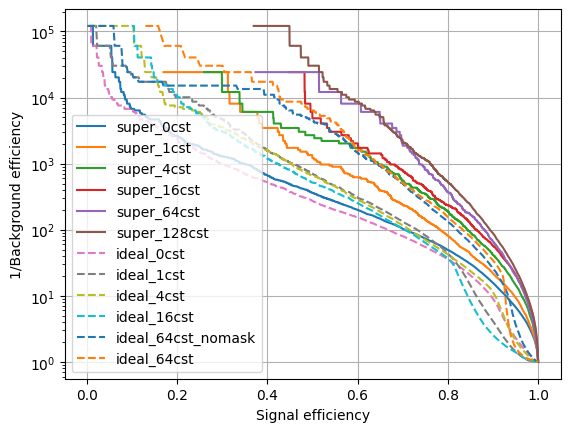

In [7]:
for key, value in data.items():
    if "ideal" in key:
        plt.plot(value["tpr"], 1/value["fpr"], label=key, linestyle='--')
    else:
        plt.plot(value["tpr"], 1/value["fpr"], label=key)
plt.yscale('log')
plt.legend()
plt.grid()
plt.xlabel("Signal efficiency")
plt.ylabel("1/Background efficiency")

/tmp/ipykernel_959334/3382289935.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/value["fpr"], value["SI"],  label=key)
/tmp/ipykernel_959334/3382289935.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/value["fpr"], value["SI"], label=key, linestyle='--')


Text(0, 0.5, 'SI')

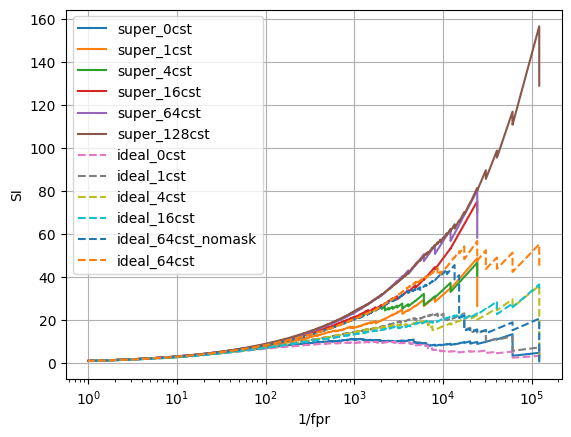

In [8]:
for key, value in data.items():
    if "ideal" in key:
        plt.plot(1/value["fpr"], value["SI"], label=key, linestyle='--')
    else:
        plt.plot(1/value["fpr"], value["SI"],  label=key)
plt.xscale('log')
plt.legend()
plt.grid()
plt.xlabel("1/fpr")
plt.ylabel("SI")

(array([0.00247301, 0.00248903, 0.0025129 , 0.00257497, 0.00268939,
        0.00276208, 0.00283077, 0.00285187, 0.00293603, 0.00296629,
        0.00289303, 0.00281119, 0.00274838, 0.00260139, 0.00241021,
        0.00224265, 0.00203186, 0.00186251, 0.00173205, 0.00158206]),
 array([3300.        , 3319.99926758, 3339.99853516, 3359.99804688,
        3379.99731445, 3399.99658203, 3419.99609375, 3439.99536133,
        3459.99462891, 3479.99389648, 3499.99316406, 3519.99267578,
        3539.99194336, 3559.99121094, 3579.99072266, 3599.98999023,
        3619.98925781, 3639.98852539, 3659.98779297, 3679.98730469,
        3699.98657227]),
 [<matplotlib.patches.Polygon at 0x14b2be772920>])

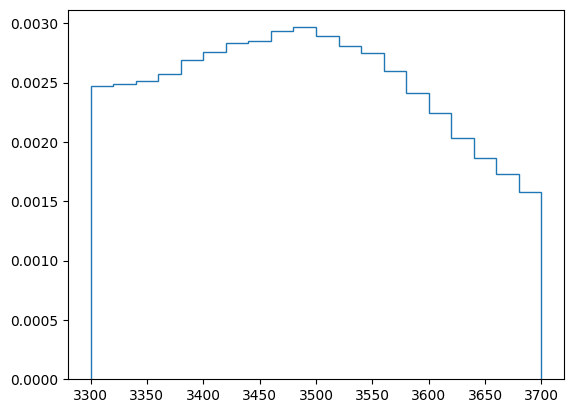

In [9]:
plt.hist(value["m_jj"], bins=20, histtype='step', label="1cst", density=True)

In [10]:
n_bins = 20
bins = np.linspace(min(value["m_jj"]), max(value["m_jj"]), n_bins+1)

In [11]:
for key, value in data.items():
    for i in range(n_bins):
        mask = (value["m_jj"] >= bins[i]) & (value["m_jj"] < bins[i+1])
        value["score_bin"+str(i)] = value["score"][mask]
        value["score_bin"+str(i)+"_mean"] = np.mean(value["score_bin"+str(i)])
        value["score_bin"+str(i)+"_std"] = np.std(value["score_bin"+str(i)])
        value["label_bin"+str(i)] = value["label"][mask]
        value["score_bin"+str(i)+"_standardised"] = (value["score_bin"+str(i)] - value["score_bin"+str(i)+"_mean"])#/value["score_bin"+str(i)+"_std"]
    value["scst"] = np.concatenate([value["score_bin"+str(i)+"_standardised"] for i in range(n_bins)])
    value["label_scst"] = np.concatenate([value["label_bin"+str(i)] for i in range(n_bins)])

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [12]:
for key, value in data.items():
    roc = roc_curve(value["label_scst"], value["scst"])
    value["fpr_scst"] = roc[0]
    value["tpr_scst"] = roc[1]
    value["auc_scst"] = auc(value["fpr_scst"], value["tpr_scst"])
    value["SI_scst"] = value["tpr_scst"]/np.sqrt(value["fpr_scst"])

/tmp/ipykernel_959334/1777227608.py:6: RuntimeWarning: divide by zero encountered in divide
  value["SI_scst"] = value["tpr_scst"]/np.sqrt(value["fpr_scst"])
/tmp/ipykernel_959334/1777227608.py:6: RuntimeWarning: invalid value encountered in divide
  value["SI_scst"] = value["tpr_scst"]/np.sqrt(value["fpr_scst"])
/tmp/ipykernel_959334/1777227608.py:6: RuntimeWarning: divide by zero encountered in divide
  value["SI_scst"] = value["tpr_scst"]/np.sqrt(value["fpr_scst"])
/tmp/ipykernel_959334/1777227608.py:6: RuntimeWarning: invalid value encountered in divide
  value["SI_scst"] = value["tpr_scst"]/np.sqrt(value["fpr_scst"])
/tmp/ipykernel_959334/1777227608.py:6: RuntimeWarning: divide by zero encountered in divide
  value["SI_scst"] = value["tpr_scst"]/np.sqrt(value["fpr_scst"])
/tmp/ipykernel_959334/1777227608.py:6: RuntimeWarning: invalid value encountered in divide
  value["SI_scst"] = value["tpr_scst"]/np.sqrt(value["fpr_scst"])
/tmp/ipykernel_959334/1777227608.py:6: RuntimeWarning: 

/tmp/ipykernel_959334/3727868718.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(value["tpr_scst"], 1/value["fpr_scst"], label=key)


Text(0, 0.5, '1/Background efficiency')

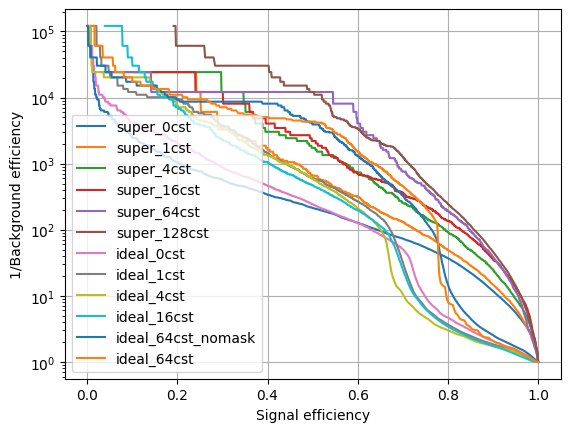

In [13]:
for key, value in data.items():
    plt.plot(value["tpr_scst"], 1/value["fpr_scst"], label=key)
plt.yscale('log')
plt.legend()
plt.grid()
plt.xlabel("Signal efficiency")
plt.ylabel("1/Background efficiency")

/tmp/ipykernel_959334/902308155.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/value["fpr_scst"], value["SI_scst"],  label=key)


Text(0, 0.5, 'SI')

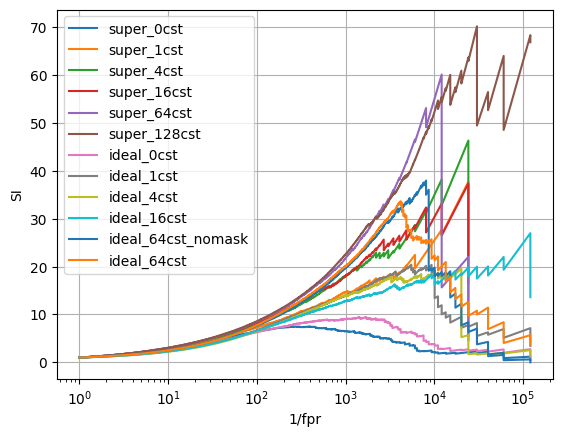

In [14]:
for key, value in data.items():
    plt.plot(1/value["fpr_scst"], value["SI_scst"],  label=key)
plt.xscale('log')
plt.legend()
plt.grid()
plt.xlabel("1/fpr")
plt.ylabel("SI")